<a href="https://colab.research.google.com/github/alfinmaulani/skripsi2/blob/main/4lstm_non_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

!pip install --upgrade scikit-learn

import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load korpus

In [ ]:
korpus1a = '/content/drive/MyDrive/korpus1dataisear(preputama).csv'
korpus1b = '/content/drive/MyDrive/korpus1dataisear(preptambah).csv'
korpus2a = '/content/drive/MyDrive/korpus2(preputama).csv'
korpus2b = '/content/drive/MyDrive/korpus2(preptambah).csv'
df = pd.read_csv(korpus1b)

In [ ]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

cari paling panjang dalam korpus

In [ ]:
paling_panjang=0
i=0
ke=0
for x in df.dokumen:
  if paling_panjang<len(x):
    paling_panjang=len(x)
    kata=x
    ke=i
  i+=1
print(paling_panjang)
print(kata)
print(ke)

78
['day', 'back', 'wait', 'bus', 'bus', 'stop', 'get', 'bus', 'prepar', 'exact', 'amount', 'coin', 'pay', 'bus', 'fair', 'got', 'bus', 'put', 'coin', 'box', 'meant', 'collect', 'bus', 'fair', 'thought', 'paid', 'want', 'get', 'insid', 'howev', 'bus', 'driver', 'call', 'ask', 'impolit', 'way', 'coin', 'stuck', 'open', 'box', 'seen', 'pay', 'stack', 'coin', 'box', 'could', 'understand', 'driver', 'kept', 'question', 'made', 'feel', 'angri', 'last', 'insert', 'dollar', 'coin', 'box', 'get', 'away', 'later', 'found', 'forgotten', 'coin', 'pocket', 'paid', 'enough', 'fair', 'first', 'time', 'enter', 'bus', 'could', 'still', 'hear', 'scold', 'felt', 'disgust']
7443


In [ ]:
df.dokumen.iloc[7443]

cek

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emosi    7516 non-null   object
 1   dokumen  7516 non-null   object
dtypes: object(2)
memory usage: 117.6+ KB


bagi kolom klasifikasi

In [ ]:
category = pd.get_dummies(df.emosi)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='emosi')
df_new

,dokumen,anger,disgust,fear,guilt,joy,sadness,shame
0,"[day, feel, close, partner, friend, feel, peac...",0,0,0,0,1,0,0
1,"[everi, time, imagin, someon, love, could, con...",0,0,1,0,0,0,0
2,"[obvious, unjust, treat, possibl, elucid]",1,0,0,0,0,0,0
3,"[think, short, time, live, relat, period, life...",0,0,0,0,0,1,0
4,"[gather, found, involuntarili, sit, next, two,...",0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7511,"[two, year, back, someon, invit, tutor, grandd...",0,0,0,0,0,0,1
7512,"[taken, respons, someth, prepar, howev, fail, ...",0,0,0,0,0,0,1
7513,"[home, heard, loud, sound, spit, outsid, door,...",0,0,1,0,0,0,0
7514,"[homework, teacher, ask, us, scold, immedi]",0,0,0,1,0,0,0


cek null

In [ ]:
df_new.isnull().sum()

dokumen    0
anger      0
disgust    0
fear       0
guilt      0
joy        0
sadness    0
shame      0
dtype: int64

padding

In [ ]:
max_features = paling_panjang+2

In [ ]:
max_features

80

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.dokumen)

In [ ]:
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# seq = tokenizer.texts_to_sequences(df.dokumen)
seq_test = tokenizer.texts_to_sequences(df.dokumen)

X_pad = sequence.pad_sequences(seq_test, padding='pre', maxlen=max_features)
# X_test_pad = pad_sequences(seq_test, padding='post',)

# train_padded = pad_sequences(train_sequences, maxlen=max_len, truncating="post", padding="post")

In [ ]:
jumlah_kata=len(tokenizer.word_index)

In [ ]:
word_index=tokenizer.word_index

In [ ]:
word_index["yes"]

1986

In [ ]:
X = X_pad
y = df_new[['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']].values
print(np.shape(X))
print(np.shape(y))

(7516, 80)
(7516, 7)


load model word embedding

In [ ]:
pakai_model=1

In [ ]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 7.8 MB/s 


In [ ]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpus1+blog(preptambah).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpus1+blog(preputama).glove')

ft

In [ ]:
model=0

In [ ]:
import gensim
import multiprocessing
from gensim.models import FastText

In [ ]:
model=gensim.models.FastText.load('/content/drive/MyDrive/korpus1+blog(preptambah).ft')

In [ ]:
model.wv.vectors.shape

(908097, 100)

In [ ]:
model.wv["yes"]

array([-1.6030304e-01,  7.4624933e-02, -6.6067569e-02, -1.9056515e-01,
       -1.0811662e-01, -1.5898502e-01,  2.9597646e-01, -4.9413821e-01,
        2.1252683e-01, -2.1294379e-01,  3.7743473e-01,  1.4332914e-01,
        1.4581354e-01, -5.7055080e-01,  2.0915738e-01,  2.4308136e-01,
       -1.4109777e-01, -4.7160303e-03, -2.7090126e-01, -3.0724242e-01,
        1.4733352e-02, -3.5831356e-01,  9.4068901e-06,  3.6258164e-01,
       -1.8123712e-02, -9.6960090e-02,  9.9078618e-02, -5.3254449e-01,
       -2.8545660e-01,  7.3417984e-02, -2.3300426e-01,  1.8089540e-01,
        6.9177553e-02,  5.4255271e-01, -6.1472241e-02, -1.8647979e-01,
        4.5107561e-01, -1.5016389e-01,  5.9499055e-01, -2.1075526e-02,
       -1.6485551e-01,  1.6829541e-02, -4.1091588e-01, -2.7934644e-02,
       -3.9017105e-01, -6.2679189e-01, -1.1576921e-02, -5.5312060e-02,
        3.4623152e-01, -3.5690212e-01, -8.1305422e-02, -6.4371251e-02,
       -1.6630973e-01,  3.2814007e-02,  3.3163077e-01,  2.6075128e-01,
      

cek model word embedding

In [ ]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(908097, 100)


In [ ]:
if pakai_model == 1:
  print(model.wv["yes"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['yes']])

[-1.6030304e-01  7.4624933e-02 -6.6067569e-02 -1.9056515e-01
 -1.0811662e-01 -1.5898502e-01  2.9597646e-01 -4.9413821e-01
  2.1252683e-01 -2.1294379e-01  3.7743473e-01  1.4332914e-01
  1.4581354e-01 -5.7055080e-01  2.0915738e-01  2.4308136e-01
 -1.4109777e-01 -4.7160303e-03 -2.7090126e-01 -3.0724242e-01
  1.4733352e-02 -3.5831356e-01  9.4068901e-06  3.6258164e-01
 -1.8123712e-02 -9.6960090e-02  9.9078618e-02 -5.3254449e-01
 -2.8545660e-01  7.3417984e-02 -2.3300426e-01  1.8089540e-01
  6.9177553e-02  5.4255271e-01 -6.1472241e-02 -1.8647979e-01
  4.5107561e-01 -1.5016389e-01  5.9499055e-01 -2.1075526e-02
 -1.6485551e-01  1.6829541e-02 -4.1091588e-01 -2.7934644e-02
 -3.9017105e-01 -6.2679189e-01 -1.1576921e-02 -5.5312060e-02
  3.4623152e-01 -3.5690212e-01 -8.1305422e-02 -6.4371251e-02
 -1.6630973e-01  3.2814007e-02  3.3163077e-01  2.6075128e-01
 -1.9765241e-02 -7.4357376e-02 -5.8203217e-02  1.3356081e-02
 -3.8230425e-01  1.4460786e-01  3.4959835e-01 -1.2472988e-01
 -4.6244461e-02  2.19380

load pre trained

In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import get_tmpfile

In [ ]:
w2vtweet='/content/drive/MyDrive/word2vec_twitter_tokens (1).bin'
glovetweet='/content/drive/MyDrive/glove.twitter.27B.100d.txt'
glovetweet2='/content/drive/MyDrive/glove.6B.100d.txt'

In [ ]:
w2vlain='/content/drive/MyDrive/enwiki.skip.size100.win10.neg15.sample1e-5.min15.txt'

In [ ]:
#w2v
model = KeyedVectors.load_word2vec_format(w2vlain, binary=False)

In [ ]:
#glove
tmp_file = get_tmpfile("/content/drive/MyDrive/enwiki.skip.size100.win10.neg15.sample1e-5.min15.txt")
glove2word2vec(glovetweet2, tmp_file)
model = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
model.wv.vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(400000, 100)

buat dictionary

In [ ]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

In [ ]:
word_index["yes"]

1986

In [ ]:
for word, i in word_index.items():
  try:
    emb_vec = model.wv[word]
  except:
    emb_vec = None
  if emb_vec is not None:
      embedding_matrix[i] = model.wv[word]

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03190911,  0.45688358,  0.24383567, ...,  0.09010225,
        -0.50971204,  0.21650791],
       [ 0.28343198, -0.17508526, -0.40999734, ...,  0.24138254,
        -0.71242166, -0.20292173],
       ...,
       [ 0.38078037, -0.09765412, -0.29311511, ...,  0.00427466,
        -0.25469127,  0.06284916],
       [-0.07124084,  0.28717381, -0.15696162, ...,  0.06185972,
        -0.20089291,  0.10556668],
       [ 0.19020058,  0.19906639, -0.52316338, ...,  0.34764054,
        -0.72100914,  0.33933437]])

In [ ]:
embedding_matrix[222]

array([-0.26425126, -0.54768002,  0.08987191,  0.04164654, -0.24467778,
        0.2261398 ,  0.21784243, -0.74992424, -0.19918837, -0.21836118,
       -0.12372885, -0.06843939, -0.44310391, -0.31231648,  0.36486349,
       -0.60003775,  0.25930223,  0.42936927, -0.09166611, -0.02790643,
        0.53253978, -0.11670237,  0.17281272, -0.0379729 ,  0.13512854,
       -0.06346019,  0.44370821, -0.85714912,  0.30169961,  0.10764456,
       -0.6121552 ,  0.31844136,  0.20111686,  0.57242703, -0.19226432,
       -0.13866067,  0.56400037, -0.06282919,  1.05028141, -0.30484378,
        0.22870721, -0.73723835,  0.05040945,  0.47709149,  0.22426313,
       -0.72201878,  0.63112295,  0.56885737,  0.15489538, -0.75401092,
       -0.16611697,  0.22187334, -0.38094136,  0.35191652,  0.44354007,
        0.36194131, -0.48350018, -0.37379712,  0.25063565, -0.38014773,
        0.05549061,  0.37834251,  0.27368852,  0.18526764, -0.50038785,
        0.07053997,  0.58305591, -0.31333229,  0.31105018,  0.33

In [ ]:
embedding_matrix.shape

(6263, 100)

1 fold

train test split

In [ ]:
print(np.shape(X))
print(np.shape(y))

(7516, 80)
(7516, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, df.emosi, random_state=0, test_size=0.1)

In [ ]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(6764, 80)
(752, 80)
(6764, 7)
(752, 7)


In [ ]:
y_train.shape

(6764, 7)

In [ ]:
unique, counts = np.unique(df.emosi, return_counts=True)
dict(zip(unique, counts))

{'anger': 1079,
 'disgust': 1066,
 'fear': 1076,
 'guilt': 1050,
 'joy': 1092,
 'sadness': 1082,
 'shame': 1071}

load package

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional, SpatialDropout1D
import tensorflow as tf
from keras.initializers import Constant

buat arsitektur lstm

In [ ]:
# Creating model
model = Sequential()

# model.add(Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix), input_length=max_features, trainable=False,))
# model.add(LSTM(100, dropout=0.1))
# model.add(Dense(7, activation="softmax"))

model.add(Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix), input_length=max_features, trainable=False))
model.add(Bidirectional(LSTM(100)))
# model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(70, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# categorical_crossentropy
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 100)           626300    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 70)                14070     
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 497       
                                                        

In [ ]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [ ]:
# history = model.fit(X_train, y_train, epochs=30, 
#                     validation_data=(X_test, y_test), 
#                     callbacks=[earlystopping], verbose=1)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[earlystopping], verbose=1)

Epoch 1/100
212/212 [==============================] - 27s 110ms/step - loss: 1.7004 - accuracy: 0.3423 - val_loss: 1.4670 - val_accuracy: 0.4521
Epoch 2/100
212/212 [==============================] - 23s 107ms/step - loss: 1.4478 - accuracy: 0.4551 - val_loss: 1.3810 - val_accuracy: 0.4840
Epoch 3/100
212/212 [==============================] - 22s 103ms/step - loss: 1.3301 - accuracy: 0.5117 - val_loss: 1.3416 - val_accuracy: 0.5133
Epoch 4/100
212/212 [==============================] - 22s 105ms/step - loss: 1.2599 - accuracy: 0.5433 - val_loss: 1.2595 - val_accuracy: 0.5279
Epoch 5/100
212/212 [==============================] - 23s 110ms/step - loss: 1.2009 - accuracy: 0.5648 - val_loss: 1.2496 - val_accuracy: 0.5306
Epoch 6/100
212/212 [==============================] - 22s 105ms/step - loss: 1.1494 - accuracy: 0.5918 - val_loss: 1.2737 - val_accuracy: 0.5372
Epoch 7/100
212/212 [==============================] - 23s 107ms/step - loss: 1.1209 - accuracy: 0.5991 - val_loss: 1.2055 -

In [ ]:
predict_x=model.predict(X_test)
y_temp=np.argmax(predict_x,axis=1)

y_pred_num=[]
y_pred_num.extend(y_temp)

In [ ]:
unique, counts = np.unique(y_temp, return_counts=True)
dict(zip(unique, counts))

{0: 125, 1: 114, 2: 99, 3: 85, 4: 112, 5: 120, 6: 97}

In [ ]:
np.sum(counts)

752

10 fold

In [ ]:
print(np.shape(X))
print(np.shape(y))

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

y_pred_num=[]

for train_index, test_index in kf.split(X,y):

  model = Sequential()

  # model.add(Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix), input_length=max_features, trainable=False,))
  # model.add(Dropout(0.3))
  model.add(Bidirectional(LSTM(200, input_shape=(180,100))))
  model.add(Dropout(0.3))
  model.add(Dense(82, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(7, activation='softmax'))

  model.compile(loss='categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

  history = model.fit(X[train_index], y[train_index], epochs=20,verbose=1)

  predict_x=model.predict(X[test_index])
  y_temp=np.argmax(predict_x,axis=1)

  y_pred_num.extend(y_temp)

TypeError: ignored

In [ ]:
np.shape(y_pred_num)

(7516,)

In [ ]:
y_pred=[]

for num in y_pred_num:
  if num == 0:
    y_pred.append('anger')
  elif num == 1:
    y_pred.append('disgust')
  elif num == 2:
    y_pred.append('fear')
  elif num == 3:
    y_pred.append('guilt')
  elif num == 4:
    y_pred.append('joy')
  elif num == 5:
    y_pred.append('sadness')
  elif num == 6:
    y_pred.append('shame')

In [ ]:
np.shape(y)

(7516, 7)

In [ ]:
np.shape(y_pred)

(7516,)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

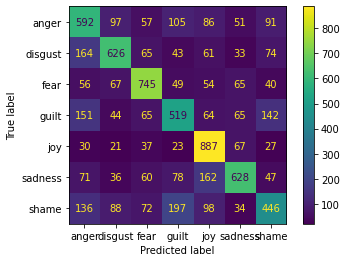

0.591138903672166
(0.5899739183213537, 0.5902391489142544, 0.5868668315357489, None)


In [ ]:
ConfusionMatrixDisplay.from_predictions(df.emosi, y_pred)
plt.show()
print(accuracy_score(df.emosi, y_pred))
print(precision_recall_fscore_support(df.emosi, y_pred, average='macro'))

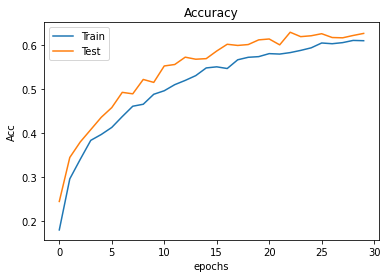

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

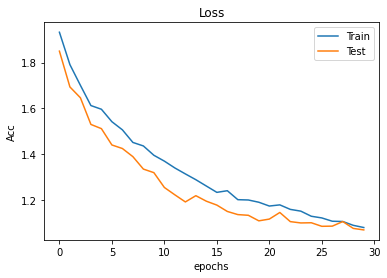

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 1s 11ms/step - loss: 1.0708 - accuracy: 0.6257


[1.0707762241363525, 0.6256648898124695]